Task 2: Customer Segmentation

Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import kagglehub
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [ ]:
data = pd.read_csv('/Users/ahmedyahia/Downloads/welcometotheelevvointernshipprogram/datasets/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Customer Segments

In [10]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)']]
x_scaled = StandardScaler().fit_transform(x)

array([[<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

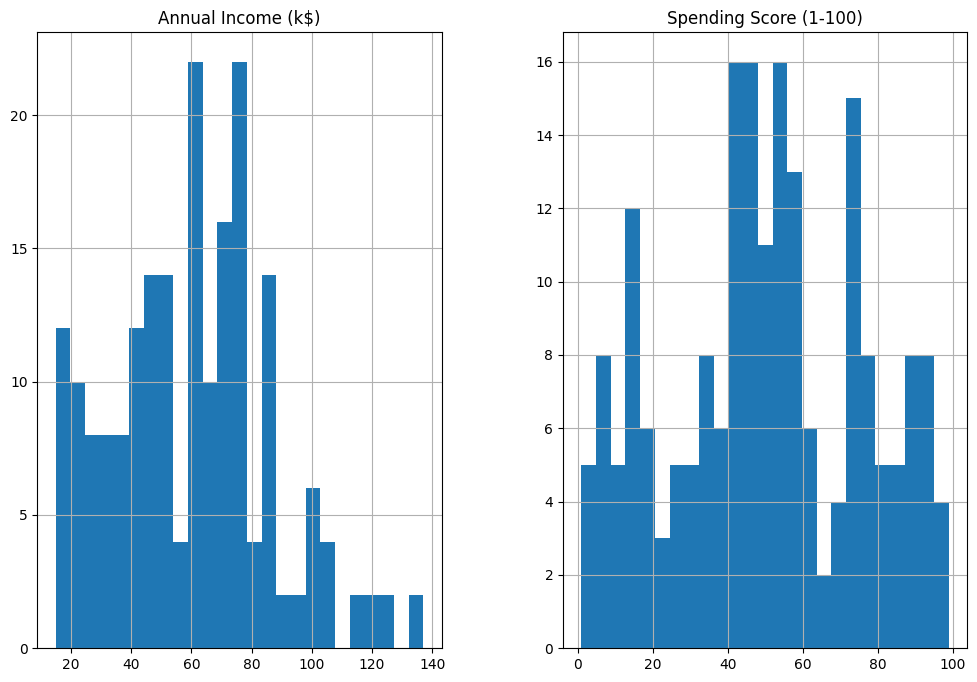

In [14]:
x.hist(figsize=(12, 8), bins=25)


Number of Clusters

In [21]:
wcss = [] # Within-cluster sum of squares
for i in range(1, 15): # Test k from 1 to 15
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
        kmeans.fit(x_scaled)
        wcss.append(kmeans.inertia_)

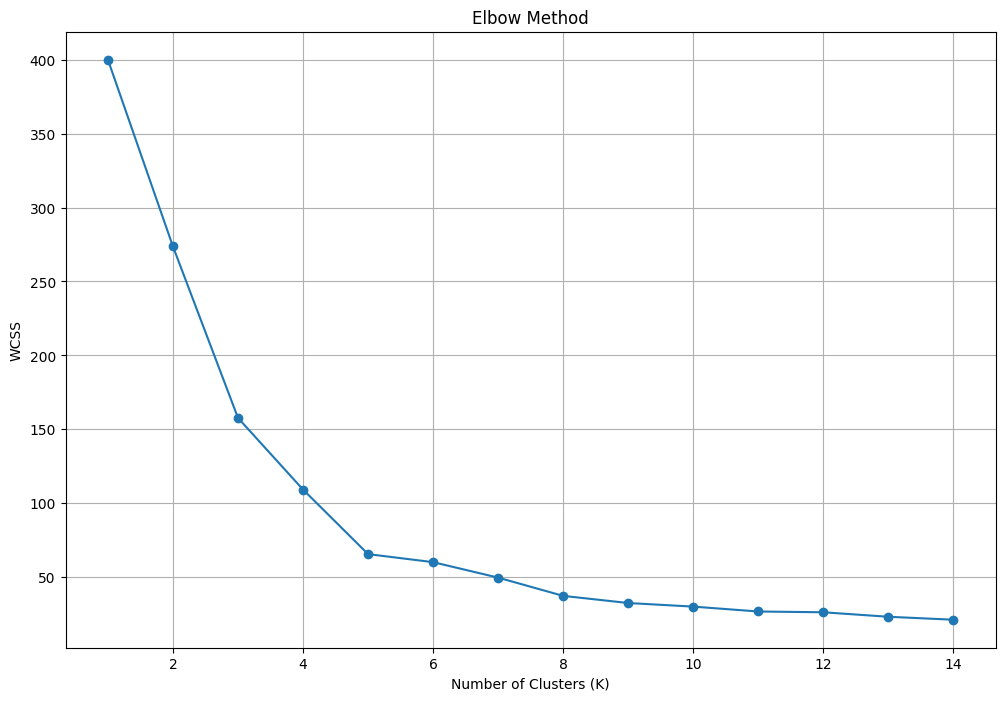

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

K-means Clustering

In [31]:
# Try clustering into 5 groups (common in this dataset)
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(x_scaled)


In [32]:
average_spending = data.groupby('cluster')['Spending Score (1-100)'].mean().reset_index()
average_spending.columns = ['cluster', 'average_spending']

print(average_spending)

   cluster  average_spending
0        0         49.518519
1        1         82.128205
2        2         79.363636
3        3         17.114286
4        4         20.913043


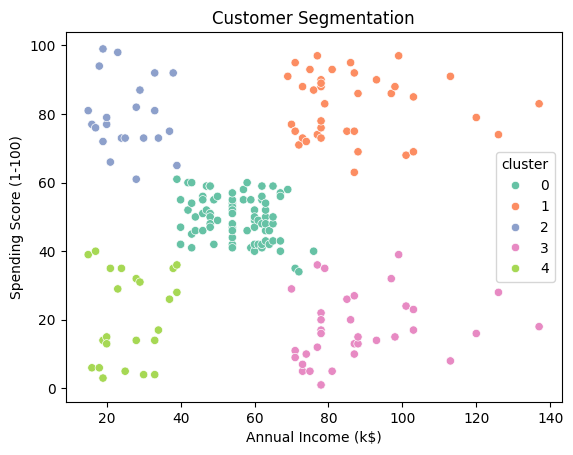

In [35]:
palette = sns.color_palette('Set2')
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', palette=palette, hue='cluster')
plt.title('Customer Segmentation')
plt.show()

DBSCAN

In [36]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(x_scaled)

In [37]:
average_spending = data.groupby('dbscan_cluster')['Spending Score (1-100)'].mean().reset_index()

average_spending.columns = ['cluster', 'average_spending']

print(average_spending)

   cluster  average_spending
0       -1         46.875000
1        0         43.101911
2        1         82.800000


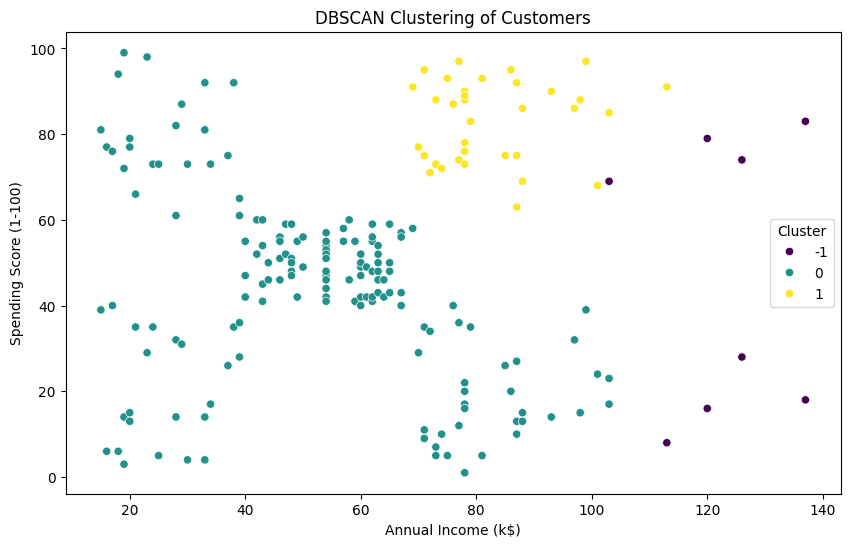

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='dbscan_cluster', palette='viridis')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()